In [1]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np
import json
from helpers import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
sys.path.append("..")
from data.unlabeled import hdro_inicator_values as inicator_values, hdro_country_name as country_name, hdro_indicator_name as indicator_name

Something went wrong loading the Economic Fitness Dataset [Errno 2] File b'../data/unlabeled/Economic_Fitness_CSV\\Country.csv' does not exist: b'../data/unlabeled/Economic_Fitness_CSV\\Country.csv'
Something went wrong loading the Education Dataset [Errno 2] File b'../data/unlabeled/Edstats_csv/EdStatsCountry.csv' does not exist: b'../data/unlabeled/Edstats_csv/EdStatsCountry.csv'


In [2]:
#print(inicator_values)
#print(country_name)
#print(indicator_name)

### Unwrap values to create good df

In [3]:
df_inicator_values = pd.DataFrame(inicator_values).T
df_inicator_values.columns = [indicator_name[nm] for nm in df_inicator_values.columns]
df_inicator_values = df_inicator_values.applymap(lambda x: x['2019'] if pd.notnull(x) else x)
df_inicator_values

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),Total population (millions),Urban population (%),...,"Gross enrolment ratio, pre-primary (% of preschool-age children)",Percentage of primary schools with access to the internet,Percentage of secondary schools with access to the internet,"Gross enrolment ratio, tertiary (% of tertiary school-age population)","Share of graduates in science, technology, engineering and mathematics programmes at tertiary level, female (%)","Share of graduates in science, technology, engineering and mathematics programmes at tertiary level, male (%)","Share of graduates from science, technology, engineering and mathematics programmes in tertiary education who are female (%)","Share of graduates from science, technology, engineering and mathematics programmes in tertiary education who are male (%)",Primary school teachers trained to teach (%),"Pupil-teacher ratio, primary school (pupils per teacher)"
AFG,26.080,13.220,36.920,1.948,6.006,27.244,68.957,79.726,38.042,25.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,30.232,23.133,38.056,4.023,6.359,30.000,150.526,65.995,31.825,66.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,93.174,93.700,92.497,9.702,10.614,29.508,19.642,52.852,2.881,61.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,72.327,71.484,73.327,10.439,10.564,46.429,NaN,NaN,0.077,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARG,57.158,59.161,54.828,11.123,10.729,39.877,62.782,21.805,44.781,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,74.942,79.127,71.583,NaN,NaN,10.000,23.886,29.983,0.197,18.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,28.020,19.920,36.918,2.880,5.146,0.971,60.352,45.627,29.162,37.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZAF,75.478,74.977,78.207,10.031,10.291,45.333,67.908,10.298,58.558,66.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZMB,44.440,38.488,54.068,6.283,8.176,17.964,120.112,78.134,17.861,44.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Display the max, min and mean number of null values per column

In [4]:
print_missing_percentages(df_inicator_values)

Max, min and mean number of missing values for the columns
Max: 98.97435897435898 %
Min: 0.0 %
Mean: 37.566718995290415 %


(0.0, 98.97435897435898)

### There is a high number of missing values, we therefore remove columns where more than 50% of the data is missing

In [5]:
dropColumnHalf(df_inicator_values)

### Again see the max, min and mean number of missing values per column

In [6]:
min_missing, max_missing = print_missing_percentages(df_inicator_values)

Max, min and mean number of missing values for the columns
Max: 49.743589743589745 %
Min: 0.0 %
Mean: 10.616150019135096 %


In [7]:
df_inicator_values.describe()

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),Total population (millions),Urban population (%),...,Gender Development Index (GDI),"Estimated gross national income per capita, female (2017 PPP $)","Estimated gross national income per capita, male (2017 PPP $)","Human Development Index (HDI), female","Human Development Index (HDI), male",Inequality-adjusted income index,Overall loss in HDI due to inequality (%),Inequality in income (%),Coefficient of human inequality,Inequality-adjusted HDI (IHDI)
count,175.000000,167.000000,167.000000,174.000000,174.000000,193.000000,185.000000,180.000000,195.000000,195.000000,...,167.000000,178.000000,178.000000,167.000000,167.000000,156.000000,152.000000,156.000000,152.000000,152.000000
mean,61.068074,61.736012,65.823587,8.480017,9.133402,22.981295,48.309346,38.258011,39.391426,59.257436,...,0.938994,14440.998511,24458.331354,0.702683,0.742186,0.545064,19.389145,23.401385,19.002599,0.595250
std,29.610798,29.284050,26.395358,3.421332,2.802984,11.828784,40.528834,27.774415,146.485855,23.231038,...,0.074559,15359.935986,23943.482628,0.165867,0.143194,0.172789,9.948718,9.744004,9.777324,0.190002
min,0.000000,1.738000,9.000000,1.070000,2.256000,0.100000,0.283000,0.144000,0.011000,13.200000,...,0.488000,186.041000,640.105000,0.270000,0.432000,0.176000,4.444000,8.500000,4.424000,0.232000
25%,37.296500,36.925000,45.356500,5.850000,6.733750,14.765000,13.177000,12.538250,2.081000,41.200000,...,0.908500,2925.614250,6275.933750,0.577000,0.621500,0.404750,10.792250,16.603000,10.594000,0.431500
50%,64.828000,68.067000,70.682000,9.111000,9.252500,21.094000,40.536000,32.533500,8.772000,60.000000,...,0.965000,8399.442500,16951.357000,0.730000,0.760000,0.527500,17.934500,21.779500,17.526000,0.604000
75%,89.145000,87.990500,90.916500,11.230500,11.551000,30.000000,70.504000,63.345500,28.562500,78.000000,...,0.986000,22583.779500,35488.476000,0.831500,0.848500,0.691750,27.615250,28.625000,27.012500,0.767250
max,100.000000,100.000000,100.000000,13.882000,14.431000,55.660000,186.538000,94.581000,1433.784000,100.000000,...,1.036000,71387.276000,107833.029000,0.949000,0.965000,0.858000,45.307000,56.996000,44.167000,0.899000


In [43]:
#Find columns that only contain integers or null values
#find_all_integer_columns(df_inicator_values)

In [8]:
df_inicator_values.columns.values

array(['Population with at least some secondary education (% ages 25 and older)',
       'Population with at least some secondary education, female (% ages 25 and older)',
       'Population with at least some secondary education, male (% ages 25 and older)',
       'Mean years of schooling, female (years)',
       'Mean years of schooling, male (years)',
       'Share of seats in parliament (% held by women)',
       'Adolescent birth rate (births per 1,000 women ages 15-19)',
       'Vulnerable employment (% of total employment)',
       'Total population (millions)', 'Urban population (%)',
       'Labour force participation rate (% ages 15 and older), female',
       'Labour force participation rate (% ages 15 and older), male',
       'Sex ratio at birth (male to female births)',
       'Remittances, inflows (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Population ages 15?64 (millions)',
       'Infants lacking immunization, measles (% of one-yea

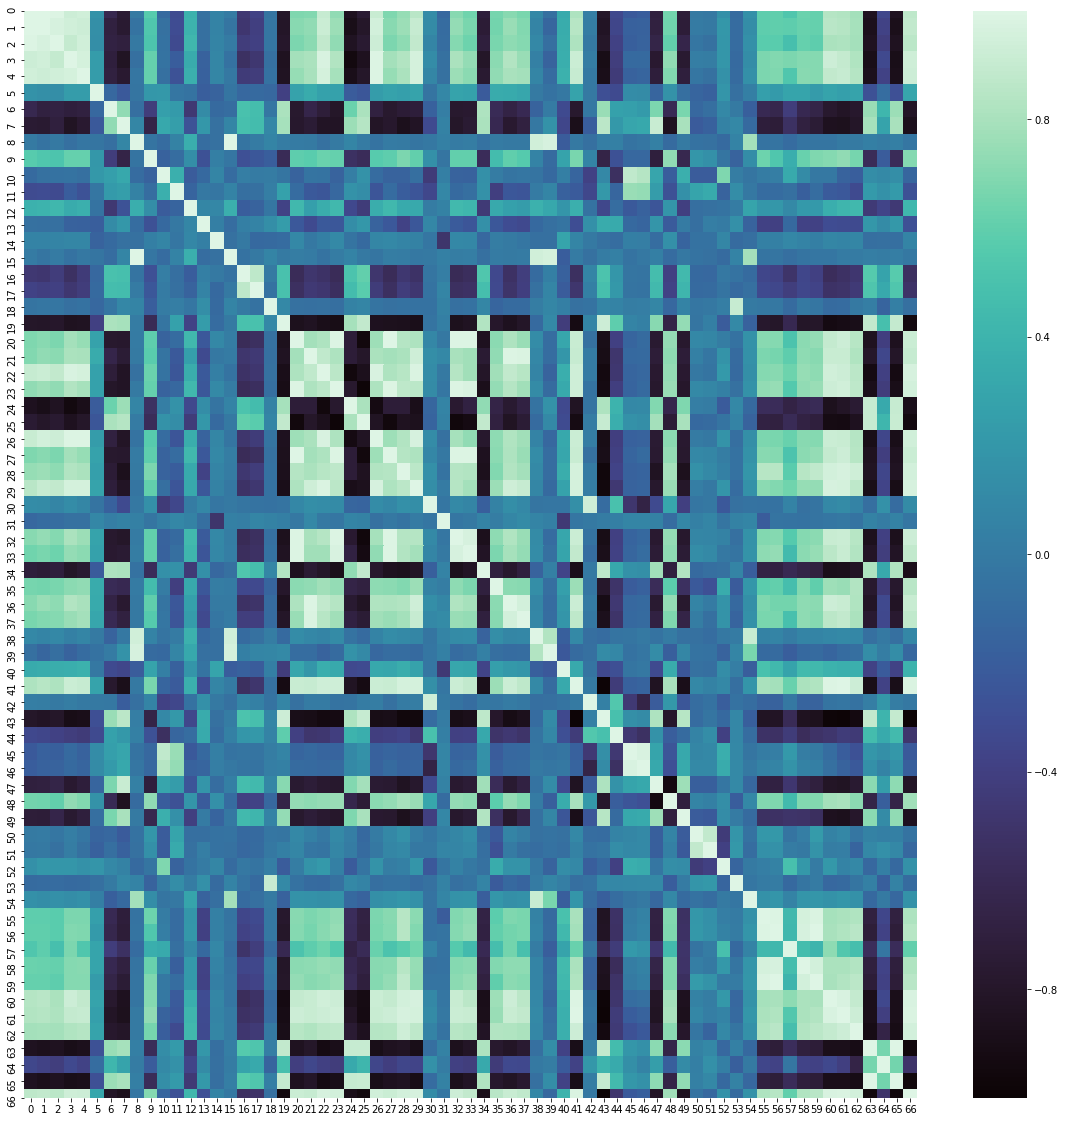

In [9]:
size = df_inicator_values.shape[1]
corr = df_inicator_values.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size),cmap='mako')

# Imputation of the whole dataset, however imputation is achieved by separating the relevant columns
# These columns then combined again in order to form the whole dataset

In [23]:
percentage_columns = []
money_columns = []
index_columns = []
year_columns = []
millions_columns = []
rest = []
rest2 = []

for column in df_inicator_values.columns.values:
    if '%' in column:
        percentage_columns.append(column)
    elif '$' in column:
        money_columns.append(column)
    elif 'years' in column:
        year_columns.append(column)
    elif 'index' in column.lower():
        index_columns.append(column)
    elif 'millions' in column.lower():
        millions_columns.append(column)
    else:
        rest.append(column)

print(percentage_columns,'\n',len(percentage_columns))
print(money_columns,'\n',len(money_columns))
print(index_columns,'\n',len(index_columns))
print(year_columns,'\n',len(year_columns))
print(millions_columns,'\n',len(millions_columns))
print(rest,'\n',len(rest))

print(len(percentage_columns)+len(money_columns)+len(index_columns)+len(year_columns)+len(rest))

['Population with at least some secondary education (% ages 25 and older)', 'Population with at least some secondary education, female (% ages 25 and older)', 'Population with at least some secondary education, male (% ages 25 and older)', 'Share of seats in parliament (% held by women)', 'Vulnerable employment (% of total employment)', 'Urban population (%)', 'Labour force participation rate (% ages 15 and older), female', 'Labour force participation rate (% ages 15 and older), male', 'Remittances, inflows (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Infants lacking immunization, measles (% of one-year-olds)', 'Infants lacking immunization, DTP (% of one-year-olds)', 'Gross fixed capital formation (% of GDP)', 'Inequality in education (%)', 'Inequality in life expectancy (%)', 'Unemployment, youth (% ages 15?24)', 'Private capital flows (% of GDP)', 'Exports and imports (% of GDP)', 'Unemployment, total (% of labour force)', 'Youth not in school or employment (% 

### Dataframe is splitted

In [24]:
split_df1 = df_inicator_values[percentage_columns]
split_df2 = df_inicator_values[money_columns]
split_df3 = df_inicator_values[index_columns]
split_df4 = df_inicator_values[year_columns]
split_df5 = df_inicator_values[millions_columns]
split_df6 = df_inicator_values[rest]

In [25]:
print('- Dataframe 1 -')
min1, max1 = print_missing_percentages(split_df1)
print('- Dataframe 2 -')
min2, max2 = print_missing_percentages(split_df2)
print('- Dataframe 3 -')
min3, max3 = print_missing_percentages(split_df3)
print('- Dataframe 4 -')
min4, max4 = print_missing_percentages(split_df4)
print('- Dataframe 5 -')
min5, max5 = print_missing_percentages(split_df5)
print('- Dataframe 6 -')
min6, max6 = print_missing_percentages(split_df6)

- Dataframe 1 -
Max, min and mean number of missing values for the columns
Max: 49.743589743589745 %
Min: 0.0 %
Mean: 14.624226348364274 %
- Dataframe 2 -
Max, min and mean number of missing values for the columns
Max: 8.717948717948717 %
Min: 2.051282051282051 %
Mean: 6.153846153846153 %
- Dataframe 3 -
Max, min and mean number of missing values for the columns
Max: 20.0 %
Min: 2.051282051282051 %
Mean: 9.790209790209792 %
- Dataframe 4 -
Max, min and mean number of missing values for the columns
Max: 10.76923076923077 %
Min: 1.0256410256410255 %
Mean: 5.584045584045585 %
- Dataframe 5 -
Max, min and mean number of missing values for the columns
Max: 5.128205128205129 %
Min: 0.0 %
Mean: 3.8461538461538467 %
- Dataframe 6 -
Max, min and mean number of missing values for the columns
Max: 22.05128205128205 %
Min: 3.076923076923077 %
Mean: 9.230769230769232 %


## Imputation of the individual datasets
### idf --> stands for imputed dataframe

[IterativeImputer] Completing matrix with shape (195, 29)
[IterativeImputer] Ending imputation round 1/49, elapsed time 0.18
[IterativeImputer] Ending imputation round 2/49, elapsed time 0.34
[IterativeImputer] Ending imputation round 3/49, elapsed time 0.42
[IterativeImputer] Ending imputation round 4/49, elapsed time 0.64
[IterativeImputer] Ending imputation round 5/49, elapsed time 0.71
[IterativeImputer] Ending imputation round 6/49, elapsed time 0.77
[IterativeImputer] Ending imputation round 7/49, elapsed time 0.83
[IterativeImputer] Ending imputation round 8/49, elapsed time 0.93
[IterativeImputer] Ending imputation round 9/49, elapsed time 1.03
[IterativeImputer] Ending imputation round 10/49, elapsed time 1.10
[IterativeImputer] Ending imputation round 11/49, elapsed time 1.17
[IterativeImputer] Ending imputation round 12/49, elapsed time 1.24
[IterativeImputer] Ending imputation round 13/49, elapsed time 1.29
[IterativeImputer] Ending imputation round 14/49, elapsed time 1.35

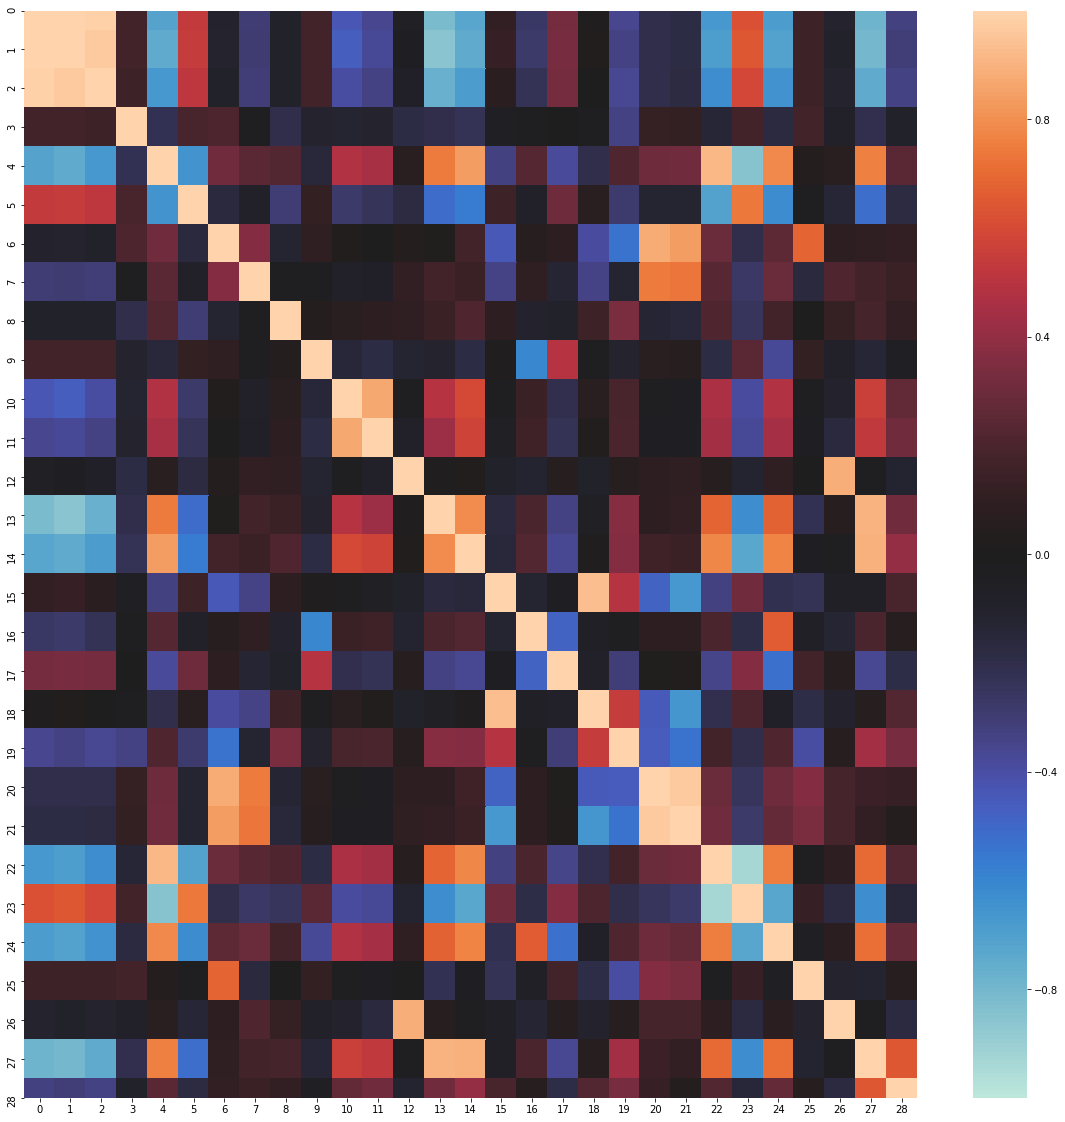

In [26]:
idf1 = impute_df(split_df1, max_iter= int(max1), verbose=2)
size = idf1.shape[1]
corr = idf1.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 5)
[IterativeImputer] Ending imputation round 1/8, elapsed time 0.06
[IterativeImputer] Ending imputation round 2/8, elapsed time 0.08
[IterativeImputer] Ending imputation round 3/8, elapsed time 0.09
[IterativeImputer] Ending imputation round 4/8, elapsed time 0.10
[IterativeImputer] Ending imputation round 5/8, elapsed time 0.11
[IterativeImputer] Ending imputation round 6/8, elapsed time 0.12
[IterativeImputer] Ending imputation round 7/8, elapsed time 0.13
[IterativeImputer] Ending imputation round 8/8, elapsed time 0.14
[IterativeImputer] Completing matrix with shape (195, 5)
[IterativeImputer] Ending imputation round 1/8, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/8, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/8, elapsed time 0.00
[IterativeImputer] Ending imputation round 4/8, elapsed time 0.00
[IterativeImputer] Ending imputation round 5/8, elapsed time 0.00
[IterativeImputer] Ending im

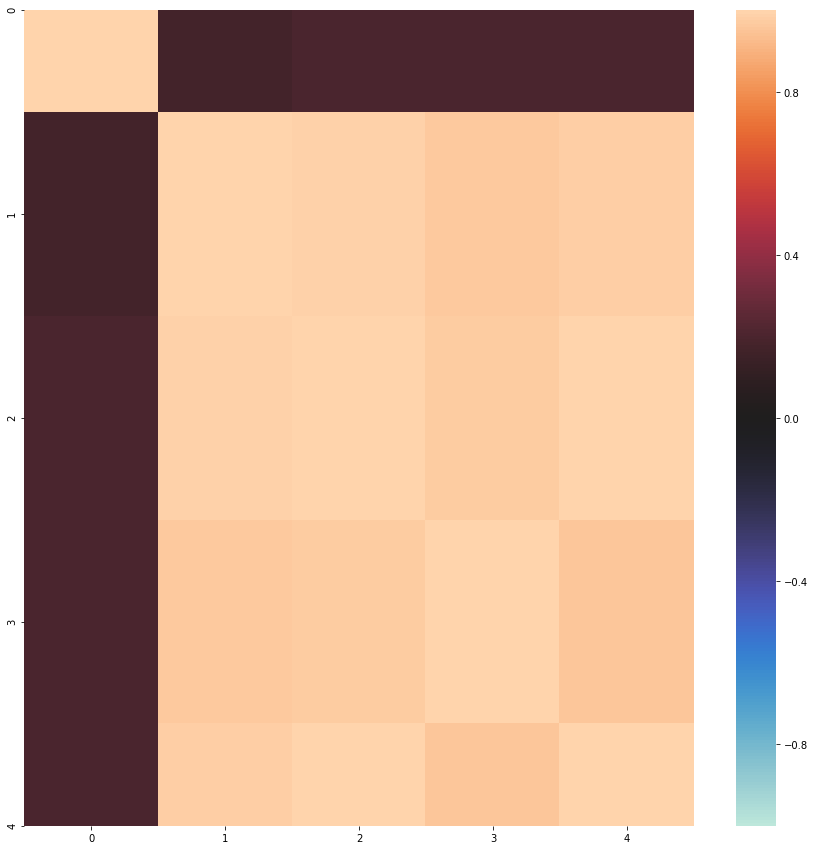

In [27]:
idf2 = impute_df(split_df2, max_iter= int(max2), verbose=2)
size = idf2.shape[1]
corr = idf2.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 11)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.09
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.11
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.13
[IterativeImputer] Ending imputation round 4/20, elapsed time 0.16
[IterativeImputer] Ending imputation round 5/20, elapsed time 0.19
[IterativeImputer] Ending imputation round 6/20, elapsed time 0.24
[IterativeImputer] Ending imputation round 7/20, elapsed time 0.27
[IterativeImputer] Ending imputation round 8/20, elapsed time 0.30
[IterativeImputer] Ending imputation round 9/20, elapsed time 0.35
[IterativeImputer] Ending imputation round 10/20, elapsed time 0.37
[IterativeImputer] Ending imputation round 11/20, elapsed time 0.40
[IterativeImputer] Ending imputation round 12/20, elapsed time 0.42
[IterativeImputer] Ending imputation round 13/20, elapsed time 0.44
[IterativeImputer] Ending imputation round 14/20, elapsed time 0.47

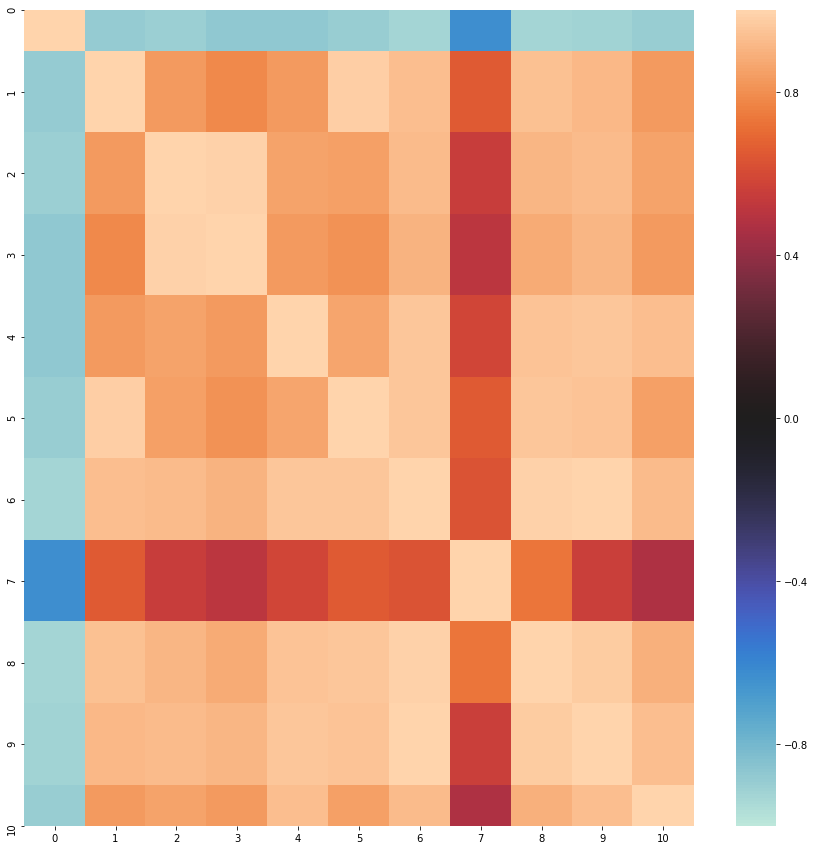

In [28]:
idf3 = impute_df(split_df3, max_iter= int(max3), verbose=2)
size = idf3.shape[1]
corr = idf3.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.07
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.09
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.10
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.11
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.12
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.14
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.15
[IterativeImputer] Ending imputation round 8/10, elapsed time 0.17
[IterativeImputer] Ending imputation round 9/10, elapsed time 0.18
[IterativeImputer] Ending imputation round 10/10, elapsed time 0.19
[IterativeImputer] Completing matrix with shape (195, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.00
[IterativeImpu

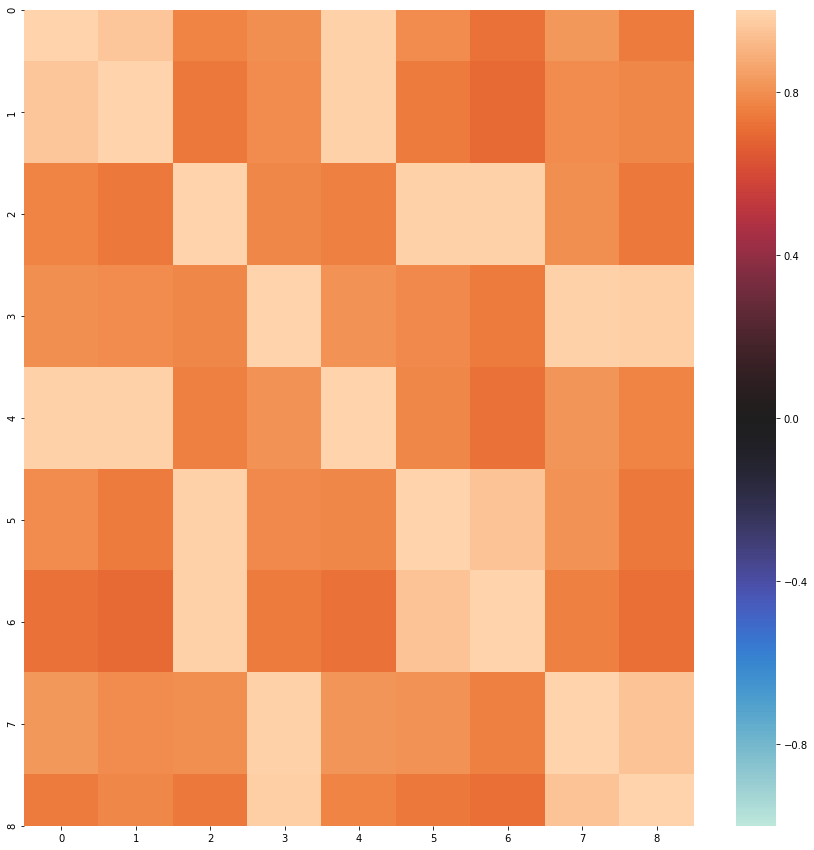

In [29]:
idf4 = impute_df(split_df4, max_iter= int(max4), verbose=2)
size = idf4.shape[1]
corr = idf4.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 4)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.04
[IterativeImputer] Ending imputation round 2/5, elapsed time 0.06
[IterativeImputer] Ending imputation round 3/5, elapsed time 0.07
[IterativeImputer] Ending imputation round 4/5, elapsed time 0.07
[IterativeImputer] Ending imputation round 5/5, elapsed time 0.08
[IterativeImputer] Completing matrix with shape (195, 4)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/5, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/5, elapsed time 0.00
[IterativeImputer] Ending imputation round 4/5, elapsed time 0.00
[IterativeImputer] Ending imputation round 5/5, elapsed time 0.00
/opt/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


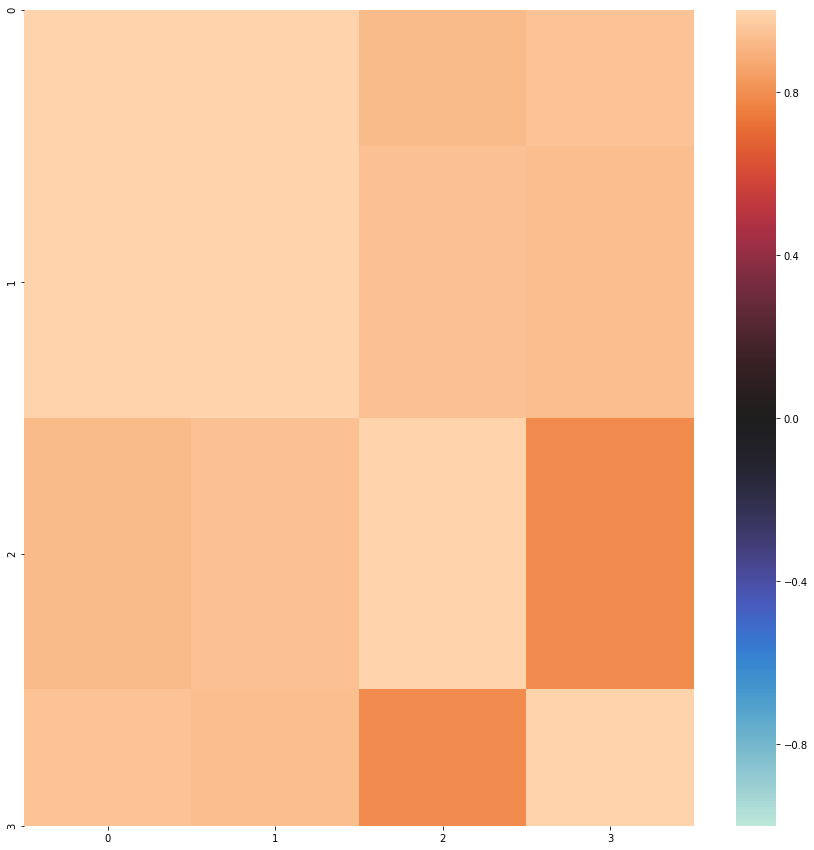

In [30]:
idf5 = impute_df(split_df5, max_iter= int(max5), verbose=2)
size = idf5.shape[1]
corr = idf5.corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

[IterativeImputer] Completing matrix with shape (195, 9)
[IterativeImputer] Ending imputation round 1/22, elapsed time 0.09
[IterativeImputer] Ending imputation round 2/22, elapsed time 0.11
[IterativeImputer] Ending imputation round 3/22, elapsed time 0.12
[IterativeImputer] Ending imputation round 4/22, elapsed time 0.13
[IterativeImputer] Ending imputation round 5/22, elapsed time 0.14
[IterativeImputer] Ending imputation round 6/22, elapsed time 0.15
[IterativeImputer] Ending imputation round 7/22, elapsed time 0.16
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (195, 9)
[IterativeImputer] Ending imputation round 1/7, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/7, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/7, elapsed time 0.00
[IterativeImputer] Ending imputation round 4/7, elapsed time 0.00
[IterativeImputer] Ending imputation round 5/7, elapsed time 0.01
[IterativeImputer] Ending imputati

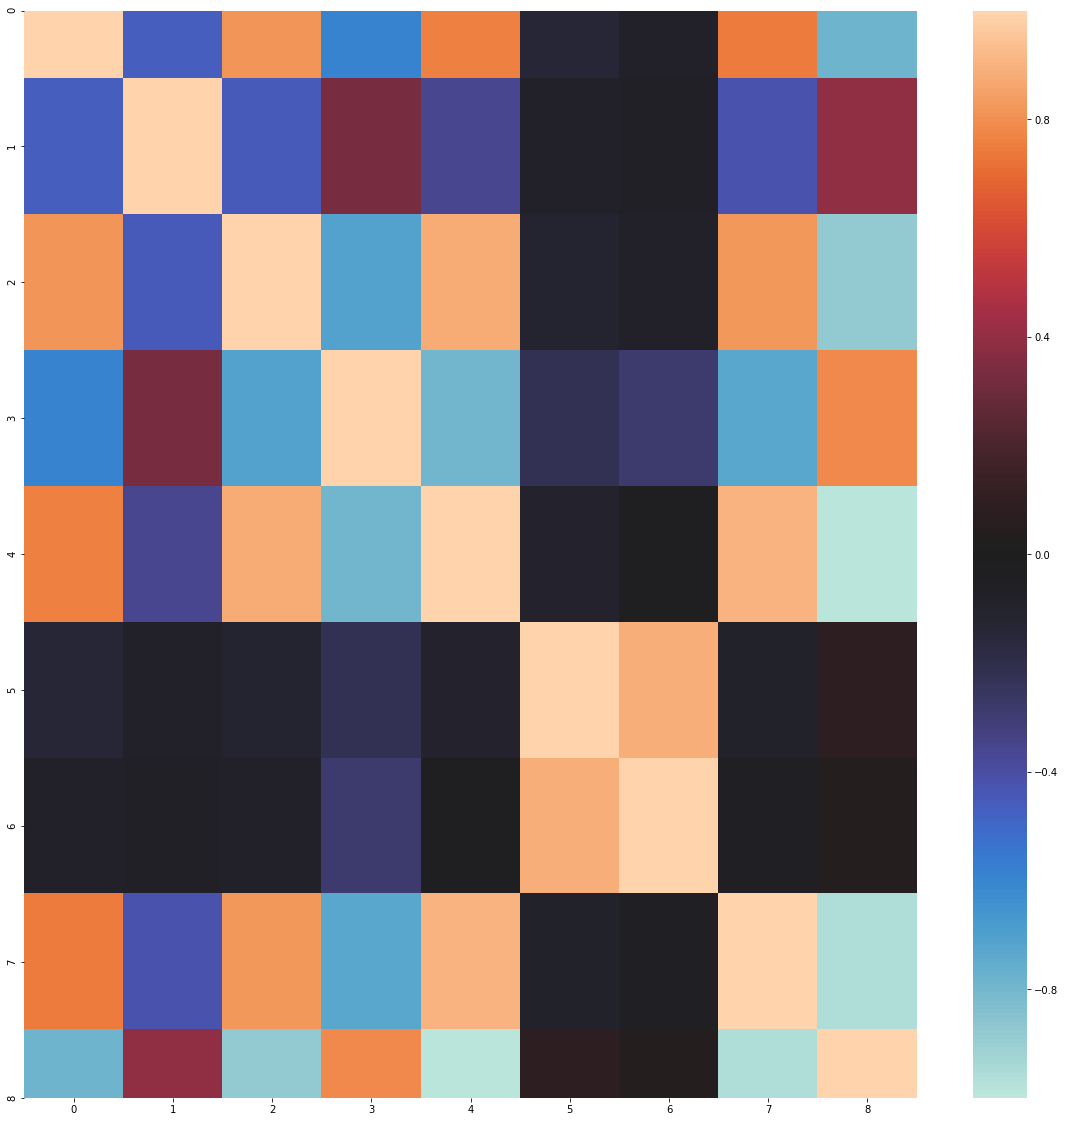

In [31]:
idf6 = impute_df(split_df6, max_iter= int(max6), verbose=2)
size = idf6.shape[1]
corr = idf6.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

In [33]:
# 29 - 5 - 11 - 9 - 13
final_df = idf1.merge(idf2, left_index=True, right_index=True)
print(final_df.shape)
final_df = final_df.merge(idf3, left_index=True, right_index=True)
print(final_df.shape)
final_df = final_df.merge(idf4, left_index=True, right_index=True)
print(final_df.shape)
final_df = final_df.merge(idf5, left_index=True, right_index=True)
print(final_df.shape)
final_df = final_df.merge(idf6, left_index=True, right_index=True)
print(final_df.shape)

display(final_df)

(195, 34)
(195, 45)
(195, 54)
(195, 58)
(195, 67)


,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Share of seats in parliament (% held by women),Vulnerable employment (% of total employment),Urban population (%),"Labour force participation rate (% ages 15 and older), female","Labour force participation rate (% ages 15 and older), male","Remittances, inflows (% of GDP)","Foreign direct investment, net inflows (% of GDP)",...,Population under age 5 (millions),"Adolescent birth rate (births per 1,000 women ages 15-19)",Sex ratio at birth (male to female births),Young age (0-14) dependency ratio (per 100 people ages 15-64),Old-age (65 and older) dependency ratio (per 100 people ages 15-64),HDI rank,Total unemployment rate (female to male ratio),Youth unemployment rate (female to male ratio),Coefficient of human inequality,Inequality-adjusted HDI (IHDI)
AFG,26.080,13.220,36.920,27.244,79.72600,25.8,21.595000,74.658000,4.542000,0.123000,...,5.639000,68.957000,1.060000,77.346000,4.764000,169.0,1.356000,1.308000,29.772732,0.360280
AGO,30.232,23.133,38.056,30.000,65.99500,66.2,76.136000,78.913000,0.002000,-4.331000,...,5.670000,150.526000,1.030000,91.097000,4.297000,148.0,1.016000,0.906000,31.733000,0.397000
ALB,93.174,93.700,92.497,29.508,52.85200,61.2,46.712000,64.568000,9.640000,7.912000,...,0.169000,19.642000,1.090000,25.439000,20.764000,69.0,0.903000,0.799000,10.893000,0.708000
AND,72.327,71.484,73.327,46.429,15.42884,88.0,54.351364,72.232983,1.703573,3.286625,...,-8.532823,14.976928,1.058547,25.017928,21.992987,36.0,1.788414,1.412073,10.066536,0.786988
ARG,57.158,59.161,54.828,39.877,21.80500,92.0,50.721000,72.730000,0.119000,1.389000,...,3.742000,62.782000,1.040000,38.334000,17.523000,46.0,1.222000,1.291000,13.238000,0.729000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,74.942,79.127,71.583,10.000,29.98300,18.1,31.104000,55.456000,17.254000,3.114609,...,0.027000,23.886000,1.080000,66.194000,8.623000,111.0,1.297000,1.492000,21.104700,0.551524
YEM,28.020,19.920,36.918,0.971,45.62700,37.3,5.834000,70.183000,7.999177,-4.382862,...,4.099000,60.352000,1.050000,67.773000,5.015000,179.0,2.088000,1.467000,30.867000,0.321000
ZAF,75.478,74.977,78.207,45.333,10.29800,66.9,49.610000,62.749000,0.253000,1.316000,...,5.786000,67.908000,1.030000,44.148000,8.253000,114.0,1.149000,1.161000,31.163000,0.468000
ZMB,44.440,38.488,54.068,17.964,78.13400,44.1,70.370000,79.076000,0.551000,2.087000,...,2.902000,120.112000,1.030000,83.229000,3.960000,146.0,1.147000,1.079000,30.592000,0.401000


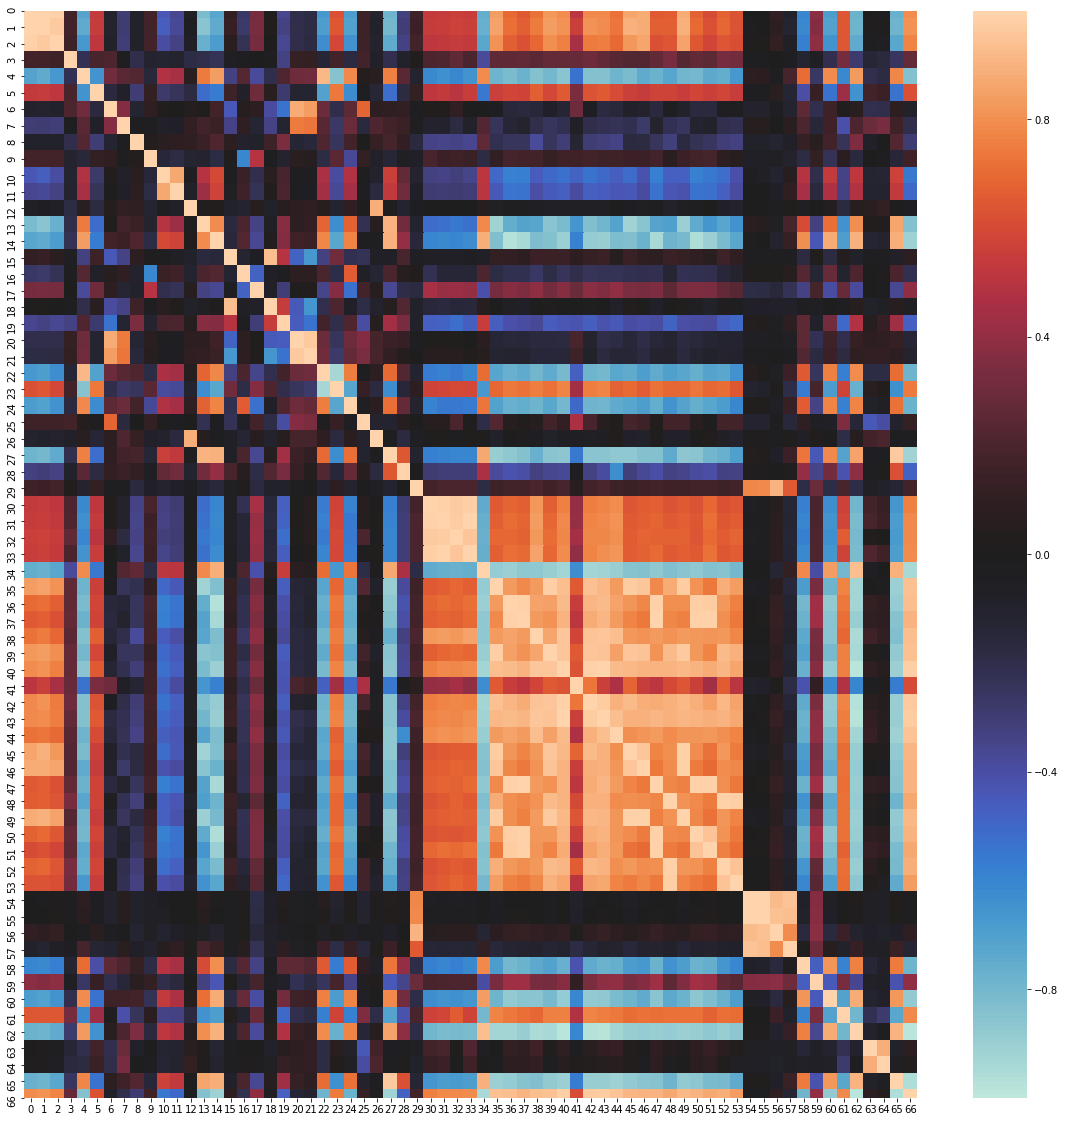

In [35]:
size = final_df.shape[1]
corr = final_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

In [43]:
x = final_df.loc[:, final_df.columns].values
print(x)
x = StandardScaler().fit_transform(x)

print(imputed_df.shape)
print(x.shape)

[[26.08       13.22       36.92       ...  1.308      29.77273216
   0.36028022]
 [30.232      23.133      38.056      ...  0.906      31.733
   0.397     ]
 [93.174      93.7        92.497      ...  0.799      10.893
   0.708     ]
 ...
 [75.478      74.977      78.207      ...  1.161      31.163
   0.468     ]
 [44.44       38.488      54.068      ...  1.079      30.592
   0.401     ]
 [64.935      59.792      70.783      ...  1.269      22.525
   0.441     ]]
(195, 67)
(195, 67)


In [44]:
np.mean(x), np.std(x)

(-1.332437583323571e-17, 1.0)

In [45]:
feat_cols = final_df.columns.values.tolist()
#print(feat_cols)
normalized_final_df = pd.DataFrame(x, columns=feat_cols)
normalized_final_df.head()

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Share of seats in parliament (% held by women),Vulnerable employment (% of total employment),Urban population (%),"Labour force participation rate (% ages 15 and older), female","Labour force participation rate (% ages 15 and older), male","Remittances, inflows (% of GDP)","Foreign direct investment, net inflows (% of GDP)",...,Population under age 5 (millions),"Adolescent birth rate (births per 1,000 women ages 15-19)",Sex ratio at birth (male to female births),Young age (0-14) dependency ratio (per 100 people ages 15-64),Old-age (65 and older) dependency ratio (per 100 people ages 15-64),HDI rank,Total unemployment rate (female to male ratio),Youth unemployment rate (female to male ratio),Coefficient of human inequality,Inequality-adjusted HDI (IHDI)
0,-1.242745,-1.537407,-0.972184,0.366696,1.554740,-1.443911,-2.035680,0.233312,-0.027719,-0.441756,...,0.230080,0.534851,0.462524,1.513894,-0.950705,1.364735,-0.115960,-0.049773,1.192044,-1.315801
1,-1.094493,-1.202607,-0.930083,0.601335,1.044887,0.299618,1.612659,0.733974,-0.796618,-0.915527,...,0.232812,2.593772,-1.216161,2.161911,-0.999777,0.976870,-0.308338,-0.485075,1.408239,-1.110134
2,1.152920,1.180706,1.087538,0.559447,0.556868,0.083835,-0.355562,-0.953924,0.835683,0.386758,...,-0.251875,-0.709932,2.141209,-0.932226,0.730564,-0.482239,-0.372276,-0.600939,-0.890168,0.631779
3,0.408555,0.430388,0.377085,2.000054,-0.832710,1.240433,0.155448,-0.052027,-0.508438,-0.105242,...,-1.018582,-0.827685,0.381230,-0.952069,0.859705,-1.091741,0.128707,0.062921,-0.981317,1.074191
4,-0.133071,0.014194,-0.308501,1.442235,-0.595953,1.413060,-0.087393,0.006454,-0.776802,-0.307092,...,0.062938,0.378985,-0.656599,-0.324548,0.390002,-0.907043,-0.191780,-0.068182,-0.631542,0.749400


In [46]:
num_components = 3
pca_final = PCA(n_components=num_components)
pComponents_final = pca_final.fit_transform(x)
component_col = ['PC'+str(i+1) for i in range(num_components)]
print(component_col)

percentage_list = [element * 100 for element in pca_final.explained_variance_ratio_]
percentage_list = ['%.2f' % elem for elem in percentage_list]
print(percentage_list)

['PC1', 'PC2', 'PC3']
['49.74', '7.93', '7.17']


In [48]:
pc_final_df = pd.DataFrame(data = pComponents_final, columns = component_col)
print(pc_final_df.shape)
pc_final_df.head()

(195, 3)


,PC1,PC2,PC3
0,8.661001,3.855433,-0.064041
1,7.369292,-2.616105,0.020173
2,-3.287211,2.088384,-0.437215
3,-5.814948,-0.746930,-0.203735
4,-3.917566,0.678215,-0.265029


In [49]:
print('Explained variation percentage per principal component: {}'.format(percentage_list))
total_explained_percentage = (sum(pca_final.explained_variance_ratio_)*100)
print('Total percentage of the explained data by',pca_final.n_components,'components is: %.2f' %total_explained_percentage)
print('Percentage of the information that is lost for using',pca_final.n_components,'components is: %.2f' %(100-total_explained_percentage))

Explained variation percentage per principal component: ['49.74', '7.93', '7.17']
Total percentage of the explained data by 3 components is: 64.84
Percentage of the information that is lost for using 3 components is: 35.16


In [50]:
l_dict = {}
for i in range(len(percentage_list)):
    l_dict[str(i)] = 'PC'+str(i+1)+' '+str(percentage_list[i])+'%'

print(l_dict)

fig = px.scatter_3d(
    pComponents_final, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_explained_percentage:.2f}%',
    labels=l_dict
)

fig.show()

{'0': 'PC1 49.74%', '1': 'PC2 7.93%', '2': 'PC3 7.17%'}


# Imputation of the whole dataset 
# This has been done without the partition of the dataframe

In [37]:
iter_number = (max_missing + min_missing) // 2
print(iter_number)

24.0


In [38]:
imputed_df = impute_df(df_inicator_values, max_iter=int(iter_number), verbose=2)

[IterativeImputer] Completing matrix with shape (195, 67)
[IterativeImputer] Ending imputation round 1/24, elapsed time 0.54
[IterativeImputer] Ending imputation round 2/24, elapsed time 0.79
[IterativeImputer] Ending imputation round 3/24, elapsed time 1.04
[IterativeImputer] Ending imputation round 4/24, elapsed time 1.28
[IterativeImputer] Ending imputation round 5/24, elapsed time 1.66
[IterativeImputer] Ending imputation round 6/24, elapsed time 2.10
[IterativeImputer] Ending imputation round 7/24, elapsed time 2.35
[IterativeImputer] Ending imputation round 8/24, elapsed time 2.70
[IterativeImputer] Ending imputation round 9/24, elapsed time 3.01
[IterativeImputer] Ending imputation round 10/24, elapsed time 3.30
[IterativeImputer] Ending imputation round 11/24, elapsed time 3.64
[IterativeImputer] Ending imputation round 12/24, elapsed time 3.89
[IterativeImputer] Ending imputation round 13/24, elapsed time 4.13
[IterativeImputer] Ending imputation round 14/24, elapsed time 4.39

In [40]:
display(imputed_df)

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),Total population (millions),Urban population (%),...,Gender Development Index (GDI),"Estimated gross national income per capita, female (2017 PPP $)","Estimated gross national income per capita, male (2017 PPP $)","Human Development Index (HDI), female","Human Development Index (HDI), male",Inequality-adjusted income index,Overall loss in HDI due to inequality (%),Inequality in income (%),Coefficient of human inequality,Inequality-adjusted HDI (IHDI)
AFG,26.080,13.220,36.920,1.948000,6.006000,27.244,68.957000,79.726000,38.042,25.8,...,0.659000,819.385000,3565.86500,0.391000,0.593000,0.361292,32.762327,23.402395,32.367091,0.334824
AGO,30.232,23.133,38.056,4.023000,6.359000,30.000,150.526000,65.995000,31.825,66.2,...,0.903000,5205.049000,7022.23100,0.552000,0.611000,0.442000,31.670000,28.900000,31.733000,0.397000
ALB,93.174,93.700,92.497,9.702000,10.614000,29.508,19.642000,52.852000,2.881,61.2,...,0.967000,11004.455000,16884.66700,0.780000,0.807000,0.648000,10.943000,13.179000,10.893000,0.708000
AND,72.327,71.484,73.327,10.439000,10.564000,46.429,21.568735,11.997487,0.077,88.0,...,0.915642,41463.356187,67486.52232,0.834249,0.901073,0.729514,16.483879,23.403984,16.000341,0.748567
ARG,57.158,59.161,54.828,11.123000,10.729000,39.877,62.782000,21.805000,44.781,92.0,...,0.993000,14872.167000,27825.75700,0.835000,0.840000,0.606000,13.728000,25.159000,13.238000,0.729000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,74.942,79.127,71.583,11.119509,10.420492,10.000,23.886000,29.983000,0.197,18.1,...,0.944219,4054.375000,8410.10900,0.686380,0.724672,0.491508,13.063131,23.403162,12.767383,0.614683
YEM,28.020,19.920,36.918,2.880000,5.146000,0.971,60.352000,45.627000,29.162,37.3,...,0.488000,186.041000,2980.03500,0.270000,0.553000,0.327000,31.702000,21.800000,30.867000,0.321000
ZAF,75.478,74.977,78.207,10.031000,10.291000,45.333,67.908000,10.298000,58.558,66.9,...,0.986000,9247.751000,15094.54600,0.702000,0.712000,0.312000,33.992000,56.996000,31.163000,0.468000
ZMB,44.440,38.488,54.068,6.283000,8.176000,17.964,120.112000,78.134000,17.861,44.1,...,0.958000,3379.549000,3270.42200,0.569000,0.593000,0.292000,31.336000,44.840000,30.592000,0.401000


In [14]:
#scatter_matrix(imputed_df, figsize=(size, size)) Takes a lot of time to work, visualization is not that great. But it can stay, just in case

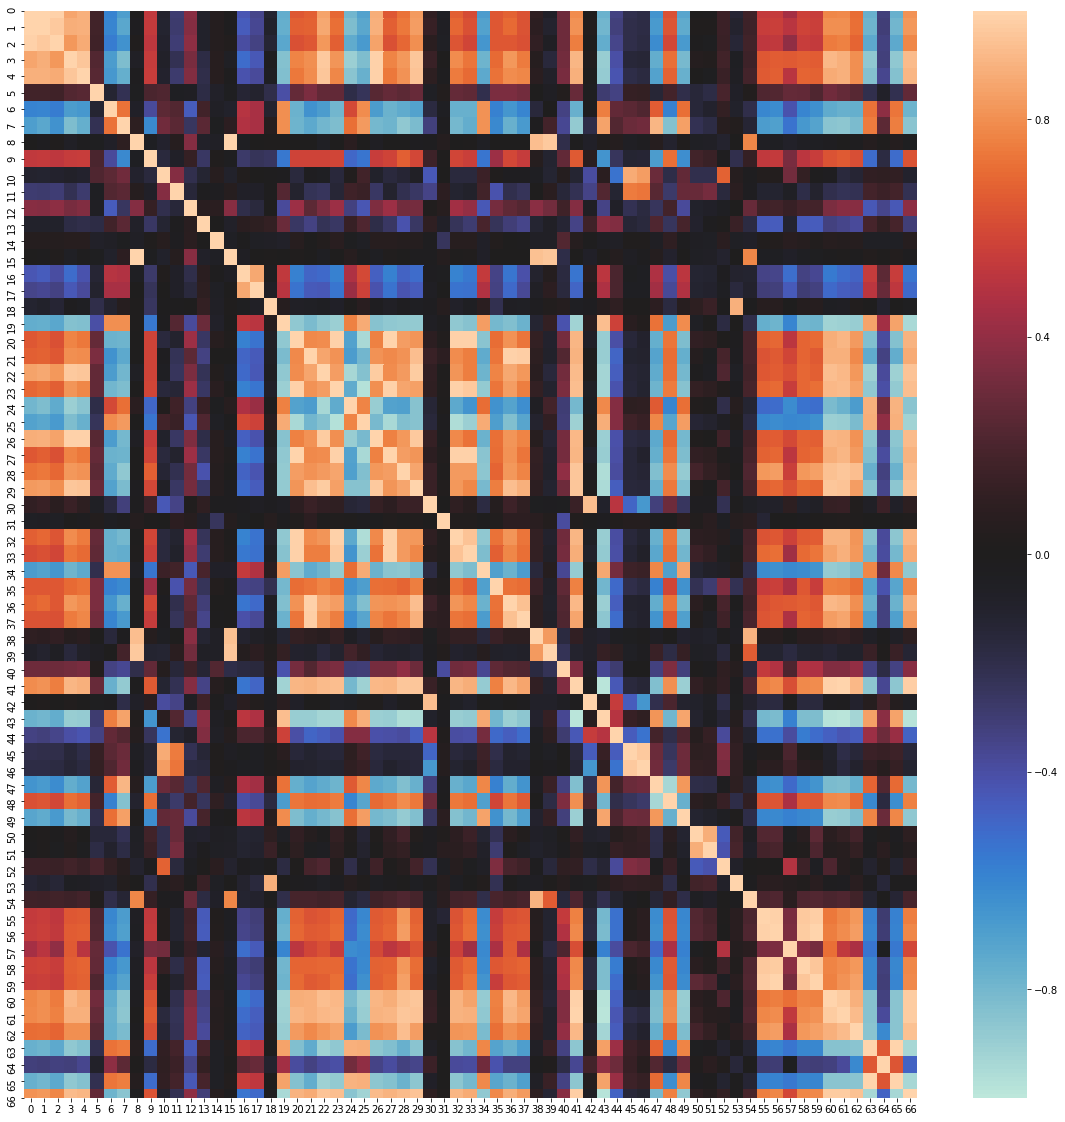

In [47]:
#sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, fmt='.1g', cmap= 'coolwarm', linewidths=1, linecolor='black', square=True, yticklabels=False, xticklabels=False)
size = imputed_df.shape[1]
corr = imputed_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, xticklabels=range(size), yticklabels=range(size))

In [43]:
x = imputed_df.loc[:, imputed_df.columns].values
print(x)
x = StandardScaler().fit_transform(x)

[[26.08       13.22       36.92       ... 23.40239465 32.36709094
   0.33482394]
 [30.232      23.133      38.056      ... 28.9        31.733
   0.397     ]
 [93.174      93.7        92.497      ... 13.179      10.893
   0.708     ]
 ...
 [75.478      74.977      78.207      ... 56.996      31.163
   0.468     ]
 [44.44       38.488      54.068      ... 44.84       30.592
   0.401     ]
 [64.935      59.792      70.783      ... 28.769      22.525
   0.441     ]]


In [44]:
print(imputed_df.shape)
print(x.shape)

(195, 67)
(195, 67)


In [45]:
display(x)

array([[-1.23937651e+00, -1.53575927e+00, -9.67770574e-01, ...,
         1.00848260e-04,  1.54283328e+00, -1.49474833e+00],
       [-1.09115273e+00, -1.20078779e+00, -9.25717124e-01, ...,
         6.32931604e-01,  1.47104631e+00, -1.14014979e+00],
       [ 1.15583694e+00,  1.18375092e+00,  1.08962783e+00, ...,
        -1.17671672e+00, -8.88300426e-01,  6.33525610e-01],
       ...,
       [ 5.24100909e-01,  5.51079584e-01,  5.60628007e-01, ...,
         3.86706934e+00,  1.40651524e+00, -7.35227114e-01],
       [-5.83936096e-01, -6.81924979e-01, -3.32970786e-01, ...,
         2.46778907e+00,  1.34187095e+00, -1.11733725e+00],
       [ 1.47722465e-01,  3.79612664e-02,  2.85799827e-01, ...,
         6.17852160e-01,  4.28586392e-01, -8.89211795e-01]])

### We want to check if the mean of the normalized dataset is 0 and std is 1
### It looks like it

In [34]:
np.mean(x), np.std(x)

(-7.613929047563262e-18, 1.0)

### To show the normalized data

In [50]:
feat_cols = imputed_df.columns.values.tolist()
#print(feat_cols)
normalized_imputed_df = pd.DataFrame(x, columns=feat_cols)
normalized_imputed_df.head()

,Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),Total population (millions),Urban population (%),...,Gender Development Index (GDI),"Estimated gross national income per capita, female (2017 PPP $)","Estimated gross national income per capita, male (2017 PPP $)","Human Development Index (HDI), female","Human Development Index (HDI), male",Inequality-adjusted income index,Overall loss in HDI due to inequality (%),Inequality in income (%),Coefficient of human inequality,Inequality-adjusted HDI (IHDI)
0,-1.239377,-1.535759,-0.967771,-1.942292,-1.112727,0.361838,0.533260,1.562488,-0.009236,-1.443911,...,-3.734095,-0.874370,-0.860080,-1.896431,-1.038168,-1.150008,1.520166,0.000101,1.542833,-1.494748
1,-1.091153,-1.200788,-0.925717,-1.319112,-0.983828,0.596448,2.577045,1.053248,-0.051786,0.299618,...,-0.448076,-0.599552,-0.722613,-0.896440,-0.908711,-0.664713,1.398583,0.632932,1.471046,-1.140150
2,1.155837,1.183751,1.089628,0.386450,0.569897,0.554566,-0.702372,0.565815,-0.249884,0.083835,...,0.413830,-0.236145,-0.330362,0.519697,0.500934,0.573955,-0.908449,-1.176717,-0.888300,0.633526
3,0.411612,0.433047,0.379976,0.607792,0.551640,1.994999,-0.654096,-0.949352,-0.269075,1.240433,...,-0.277818,1.672497,1.682187,0.856642,1.177510,1.064095,-0.291718,0.000284,-0.310086,0.864885
4,-0.129912,0.016639,-0.304836,0.813216,0.611890,1.437247,0.378540,-0.585622,0.036887,1.413060,...,0.763980,0.006217,0.104790,0.861308,0.738272,0.321411,-0.598463,0.202304,-0.622817,0.753291


### Now we start with the PCA Part

In [109]:
num_components = 3
pca_imputed = PCA(n_components=num_components)
pComponents_imputed = pca_imputed.fit_transform(x)
component_col = ['PC'+str(i+1) for i in range(num_components)]
print(component_col)

percentage_list = [element * 100 for element in pca_imputed.explained_variance_ratio_]
percentage_list = ['%.2f' % elem for elem in percentage_list]
print(percentage_list)

['PC1', 'PC2', 'PC3']
['49.80', '7.90', '7.20']


### PC stands for principal components

In [82]:
pc_imputed_df = pd.DataFrame(data = pComponents_imputed, columns = component_col)
print(pc_imputed_df.shape)
pc_imputed_df.head()

(195, 3)


,PC1,PC2,PC3
0,8.740608,3.668457,-0.157376
1,7.364151,-2.664102,0.136981
2,-3.265869,2.200737,-0.526536
3,-5.434715,-1.268159,-0.277446
4,-3.971686,0.572238,-0.254418


In [111]:
print('Explained variation percentage per principal component: {}'.format(percentage_list))
total_explained_percentage = (sum(pca_imputed.explained_variance_ratio_)*100)
print('Total percentage of the explained data by',pca_imputed.n_components,'components is: %.2f' %total_explained_percentage)
print('Percentage of the information that is lost for using',pca_imputed.n_components,'components is: %.2f' %(100-total_explained_percentage))

Explained variation percentage per principal component: ['49.80', '7.90', '7.20']
Total percentage of the explained data by 3 components is: 64.90
Percentage of the information that is lost for using 3 components is: 35.10


### Outliers are a big problem as it can be seen from the graph

In [117]:
l_dict = {}
for i in range(len(percentage_list)):
    l_dict[str(i)] = 'PC'+str(i+1)+' '+str(percentage_list[i])+'%'

print(l_dict)

fig = px.scatter_3d(
    pComponents_imputed, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_explained_percentage:.2f}%',
    labels=l_dict
)

fig.show()

{'0': 'PC1 49.80%', '1': 'PC2 7.90%', '2': 'PC3 7.20%'}


In [ ]:
imputed_df.to_csv("data/unlabeled/hdro_preprocessed.csv")